<a href="https://colab.research.google.com/github/Someshwarms/chatbot/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [43]:
import json
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

In [46]:
pip install colorama

In [47]:
import colorama

In [48]:
with open("/content/drive/MyDrive/bot1.json") as file:
  data=json.load(file)

In [49]:
data

{'intents': [{'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hello', 'Hay'],
   'responses': ['Hello', 'Hi', 'Hi there'],
   'tag': 'greeting'},
  {'patterns': ['Bye', 'See you later', 'Goodbye'],
   'responses': ['See you later', 'Have a nice day', 'Bye! Come back again'],
   'tag': 'goodbye'},
  {'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    'Thanks for the help'],
   'responses': ['Happy to help!',
    'Any time!',
    'My pleasure',
    "You're most welcome!"],
   'tag': 'thanks'},
  {'patterns': ['Who are you?', 'What are you?', 'Who you are?'],
   'responses': ["I'm Aditya, your bot assistant",
    "I'm Aditya, an Artificial Intelligent bot"],
   'tag': 'about'},
  {'patterns': ['what is your name',
    'what should I call you',
    'whats your name?'],
   'responses': ['You can call me Aditya.',
    "I'm Aditya!",
    'Just call me as Aditya'],
   'tag': 'name'},
  {'patterns': ['Could you help me?',
    'give me a hand please',
    'Can you help?',
    'What

In [50]:
training_sentences=[]
training_labels=[]
labels=[]
responses=[]

In [51]:
for intent in data['intents']:
  for pattern in intent['patterns']:
    training_sentences.append(pattern)
    training_labels.append(intent['tag'])
  responses.append(intent['responses'])

  if intent['tag'] not in labels:
    labels.append(intent['tag'])

num_classes=len(labels)

In [52]:
num_classes

8

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(training_labels)
training_labels=label_encoder.transform(training_labels)

In [54]:
training_labels

array([4, 4, 4, 4, 4, 3, 3, 3, 7, 7, 7, 7, 0, 0, 0, 6, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 2, 2, 2, 2, 2, 1, 1, 1])

In [55]:
vocab_size=1000
embedding_dim=16
max_len=20
oov_token="<OOV>"

In [56]:
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentences)
padded_sequences=tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=max_len)

In [57]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_len))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(num_classes,activation="softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 16)            16000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
Total params: 16,680
Trainable params: 16,680
Non-trainable params: 0
_________________________________________________________________


In [59]:
epochs=500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/500
2/2 [==============================] - 0s 14ms/step - loss: 0.5707 - accuracy: 0.8485
Epoch 2/500
2/2 [==============================] - 0s 19ms/step - loss: 0.5682 - accuracy: 0.8485
Epoch 3/500
2/2 [==============================] - 0s 23ms/step - loss: 0.5652 - accuracy: 0.8485
Epoch 4/500
2/2 [==============================] - 0s 20ms/step - loss: 0.5616 - accuracy: 0.8182
Epoch 5/500
2/2 [==============================] - 0s 23ms/step - loss: 0.5585 - accuracy: 0.8182
Epoch 6/500
2/2 [==============================] - 0s 17ms/step - loss: 0.5564 - accuracy: 0.8182
Epoch 7/500
2/2 [==============================] - 0s 15ms/step - loss: 0.5547 - accuracy: 0.8182
Epoch 8/500
2/2 [==============================] - 0s 13ms/step - loss: 0.5556 - accuracy: 0.8485
Epoch 9/500
2/2 [==============================] - 0s 13ms/step - loss: 0.5552 - accuracy: 0.8485
Epoch 10/500
2/2 [==============================] - 0s 14ms/step - loss: 0.5539 - accuracy: 0.8485
Epoch 11/500
2/2 [=

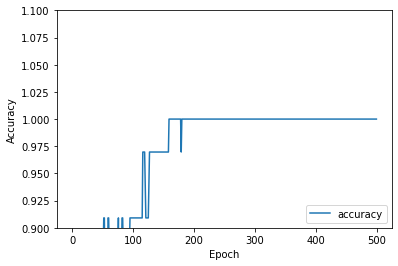

In [60]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.1])
plt.legend(loc='lower right')

In [61]:
model.save("chat_model1")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(label_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model1/assets


In [62]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("/content/drive/MyDrive/bot1.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model1')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: hi
ChatBot: Hi there
User: who are you?
ChatBot: I'm Aditya, your bot assistant
User: ok bye
ChatBot: Have a nice day
User: quit
